# CHEGADA DE TURISTAS NO BRASIL

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode
import re

df_20 = pd.read_csv('bases/chegadas_2020.csv', sep=';', encoding='Latin-1')
df_21 = pd.read_csv('bases/chegadas_2021.csv', sep=';', encoding='Latin-1')
df_22 = pd.read_csv('bases/chegadas_2022.csv', sep=';', encoding='Latin-1')
df_23 = pd.read_csv('bases/chegadas_2023.csv', sep=';', encoding='Latin-1')
df_24 = pd.read_csv('bases/chegadas_2024.csv', sep=';', encoding='Latin-1')

df = pd.concat([df_20, df_21, df_22, df_23, df_24])
df.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2020,janeiro,1,0
1,África,1,Angola,6,Acre,1,Aérea,1,2020,janeiro,1,0
2,África,1,Cabo Verde,35,Acre,1,Aérea,1,2020,janeiro,1,0
3,África,1,Egito,60,Acre,1,Aérea,1,2020,janeiro,1,0
4,África,1,Gana,77,Acre,1,Aérea,1,2020,janeiro,1,0


In [37]:
df.shape

(216092, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216092 entries, 0 to 22855
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Continente      216092 non-null  object
 1   cod continente  216092 non-null  int64 
 2   País            216092 non-null  object
 3   cod pais        216092 non-null  int64 
 4   UF              216092 non-null  object
 5   cod uf          216092 non-null  int64 
 6   Via             216092 non-null  object
 7   cod via         216092 non-null  int64 
 8   ano             216092 non-null  int64 
 9   Mês             216092 non-null  object
 10  cod mes         216092 non-null  int64 
 11  Chegadas        216092 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 21.4+ MB


In [39]:
df.isnull().sum()

Continente        0
cod continente    0
País              0
cod pais          0
UF                0
cod uf            0
Via               0
cod via           0
ano               0
Mês               0
cod mes           0
Chegadas          0
dtype: int64

## Limpando os dados

In [40]:
# replace values in columns
df_24.columns = [
    re.sub(r'\W+', '_', unidecode(col)).lower()
    for col in df_24.columns
]

df.columns = [
    re.sub(r'\W+', '_', unidecode(col)).lower()
    for col in df_24.columns
]

df['mes'] = df['mes'].str.lower()



## 2. Total de turistas

- Há uma certa tendência de crescimento no número de turista ao longo dos anos

    ano  chegadas
0  2020   2146435
1  2021    745871
2  2022   3630031
3  2023   5908341
4  2024   6773619


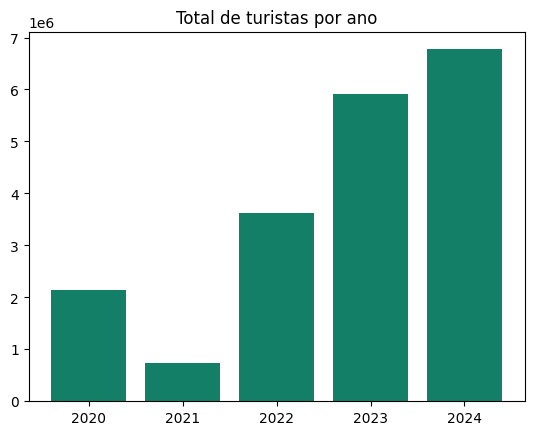

In [41]:
tur_ano = df.groupby('ano')['chegadas'].sum().reset_index()
print(tur_ano)

plt.bar(tur_ano['ano'], tur_ano['chegadas'], color='#137F67')
plt.title('Total de turistas por ano')
plt.show()

## 3. Quantidade de turistas por continente

In [42]:
continente = df.groupby('continente')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)

# porcentagem relativa
continente['%_relativa'] = (continente['chegadas'] / df['chegadas'].sum()) * 100

# porcentagem absoluta
continente['%_acumulada'] = continente['%_relativa'].cumsum(axis='index')
continente

,continente,chegadas,%_relativa,%_acumulada
2,América do Sul,11124743,57.928405,57.928405
4,Europa,4270579,22.237622,80.166027
1,América do Norte,2679150,13.950784,94.116811
7,Ásia,615835,3.206756,97.323568
0,América Central e Caribe,178331,0.928599,98.252167
5,Oceania,176224,0.917628,99.169795
6,África,159245,0.829215,99.999011
3,Continente não especificado,190,0.000989,100.000000


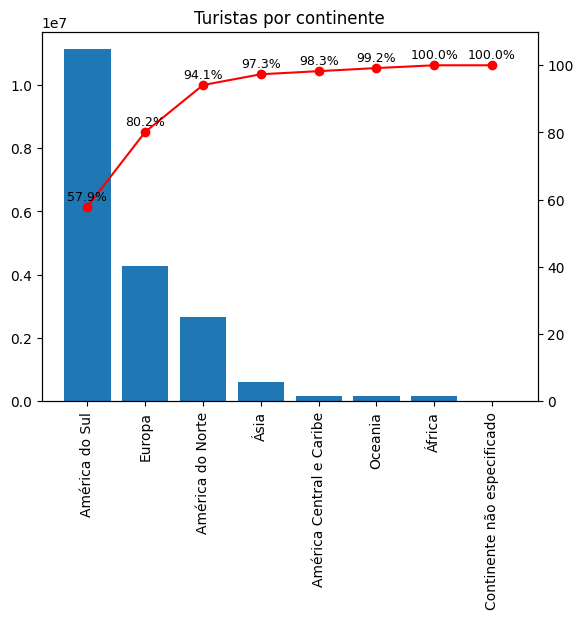

In [43]:
fig, ax1 = plt.subplots()

ax1.bar(continente['continente'], continente['chegadas'])

ax2 = ax1.twinx()
ax2.plot(continente['continente'], continente['%_acumulada'], color='red', marker='o')
ax2.set_ylim(0, 110)

ax1.tick_params(axis="x", rotation=90)

for i, valor in enumerate(continente['%_acumulada']):
    ax2.text(i, valor + 2, f'{valor:.1f}%', color='black', ha='center', fontsize=9)

ax1.set_title('Turistas por continente')
plt.show()

## 4. Países que possuem mais turistas

In [44]:
paises = df.groupby('pais')['chegadas'].sum().nlargest(10)
paises.reset_index().sort_values(by='chegadas', ascending=False)


,pais,chegadas
0,Argentina,5830269
1,Estados Unidos,2142309
2,Chile,1492788
3,Paraguai,1452821
4,Uruguai,1028520
5,França,658849
6,Portugal,640296
7,Alemanha,552081
8,Itália,435261
9,Reino Unido,430306


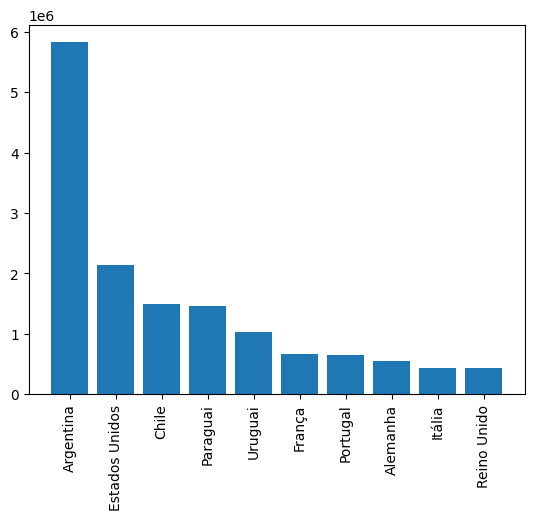

In [45]:
plt.bar(paises.index, paises.values)
plt.xticks(rotation=90)
plt.show()

## 5. Estado brasileiros que recebem mais turistas

In [46]:
estados = df.groupby('uf')['chegadas'].sum()
estados = estados.reset_index().sort_values(by='chegadas', ascending=False)
estados

,uf,chegadas
17,São Paulo,6944200
14,Rio de Janeiro,3852732
13,Rio Grande do Sul,2871571
9,Paraná,2652109
16,Santa Catarina,1075556
3,Bahia,344989
4,Ceará,265311
6,Mato Grosso do Sul,244305
11,Pernambuco,196862
5,Distrito Federal,178898


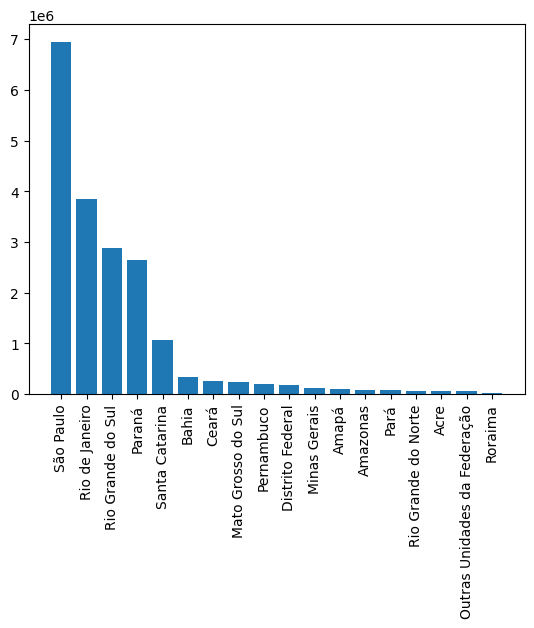

In [47]:
plt.bar(estados['uf'], estados['chegadas'])
plt.xticks(rotation=90)
plt.show()

## 6. Turistas por mês

In [48]:
df.groupby('mes')['chegadas'].sum().reset_index().sort_values(by='chegadas', ascending=False)

,mes,chegadas
4,janeiro,3199966
3,fevereiro,2761312
2,dezembro,2211839
10,novembro,1566314
11,outubro,1342881
9,março,1339864
5,julho,1164061
12,setembro,1133433
0,abril,1133167
1,agosto,1095322


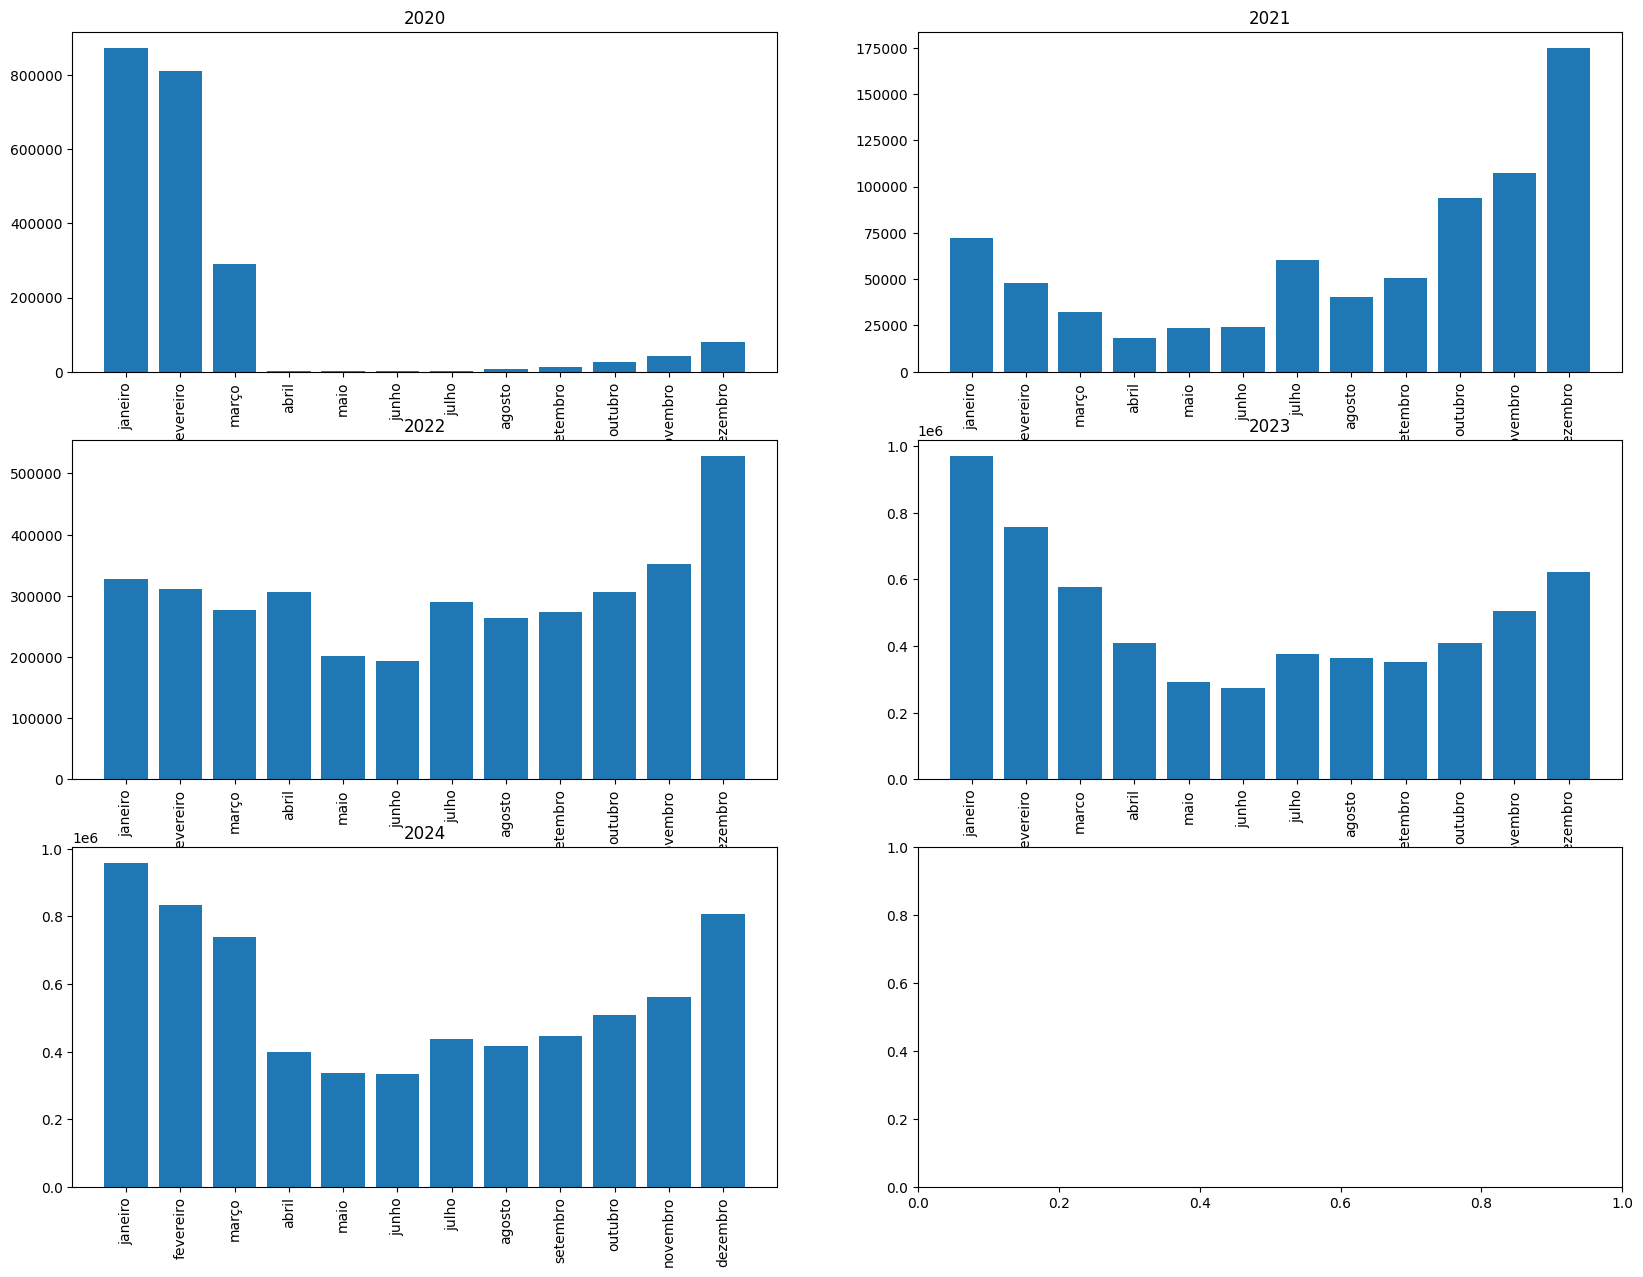

In [58]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

l = 0
c = 0
ano = [2020, 2021, 2022, 2023, 2024]
for value in ano:
    df_ano = df[df['ano'] == value].groupby(['mes', 'cod_mes'])['chegadas'].sum().reset_index().sort_values(by='cod_mes')
    ax[l, c].bar(df_ano['mes'], df_ano['chegadas'])
    ax[l, c].set_title(value)
    ax[l, c].tick_params(axis="x", rotation=90)

    if c == 1:
        c = 0
        l = l+1
    else:
        c = c+1
        
plt.show()